In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


DecisionTreeClassifier

Precision: 0.71
Recall: 0.72
F1 Score: 0.71


C:\Users\ragav\AppData\Local\Temp\ipykernel_19692\3597572371.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--k', color='red')
C:\Users\ragav\AppData\Local\Temp\ipykernel_19692\3597572371.py:77: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')


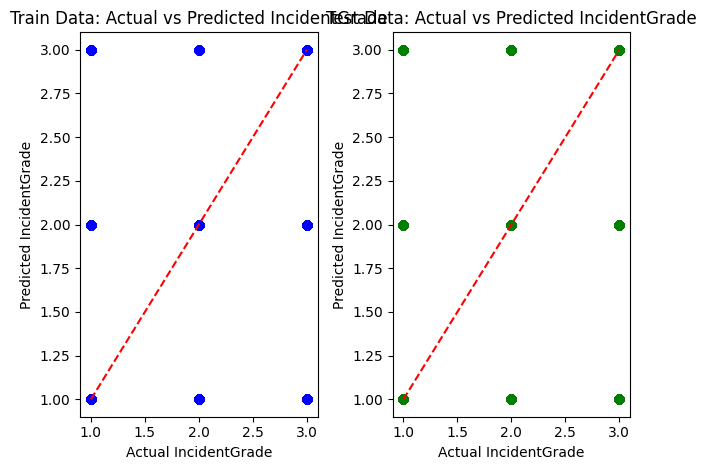

In [3]:
# Load DataFrames
train_df = pd.read_csv('Processed_GUIDE_Train.csv')
test_df = pd.read_csv('Processed_GUIDE_Test.csv')

# Drop rows with NaNs in IncidentGrade
train_df = train_df.dropna(subset=['IncidentGrade'])

# Sample a subset of the data to avoid memory issues
train_df = train_df.sample(n=100000, random_state=42)

# Encode categorical columns in training DataFrame
categorical_cols_train = train_df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols_train:
    train_df[col] = train_df[col].astype(str)
    train_df[col] = le.fit_transform(train_df[col])

# Encode categorical columns in test DataFrame
categorical_cols_test = test_df.select_dtypes(include=['object']).columns
for col in categorical_cols_test:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = le.fit_transform(test_df[col])

# Split train data into feature and target
x_train = train_df.drop('IncidentGrade', axis=1)
y_train = train_df['IncidentGrade']

# Split test data into feature and target
x_test = test_df.drop('IncidentGrade', axis=1)
y_test = test_df['IncidentGrade']

# Scale features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier()

# Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(x_test)

# Evaluate
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Training data plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, best_model.predict(x_train), alpha=0.7, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--k', color='red')
plt.xlabel('Actual IncidentGrade')
plt.ylabel('Predicted IncidentGrade')
plt.title('Train Data: Actual vs Predicted IncidentGrade')

# Test data plot
plt.subplot(1, 2, 2)
plt.subplots_adjust(wspace=0.5)
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')
plt.xlabel('Actual IncidentGrade')
plt.ylabel('Predicted IncidentGrade')
plt.title('Test Data: Actual vs Predicted IncidentGrade')

plt.tight_layout()
plt.show()


RandomForestClassifier

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Precision: 0.85
Recall: 0.81
F1 Score: 0.82


C:\Users\ragav\AppData\Local\Temp\ipykernel_19556\1996369976.py:137: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--k', color='red')
C:\Users\ragav\AppData\Local\Temp\ipykernel_19556\1996369976.py:145: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')


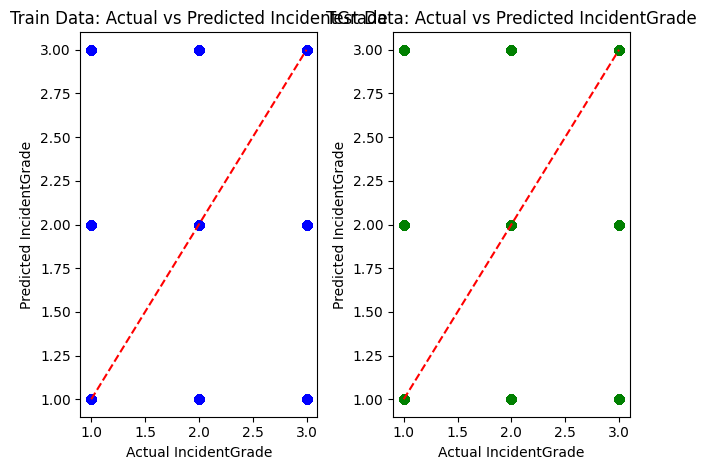

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load DataFrames
train_df = pd.read_csv('Processed_GUIDE_Train.xls')
test_df = pd.read_csv('Processed_GUIDE_Test.xls')

# Sample a subset of the data to avoid MemoryError
train_df = train_df.sample(frac=0.1, random_state=42)
test_df = test_df.sample(frac=0.1, random_state=42)

# Drop rows with NaNs in IncidentGrade
train_df = train_df.dropna(subset=['IncidentGrade'])

# Process categorical columns in training DataFrame
categorical_cols_train = train_df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols_train:
    train_df[col] = train_df[col].astype(str)
    train_df[col] = le.fit_transform(train_df[col])

# Process categorical columns in test DataFrame
categorical_cols_test = test_df.select_dtypes(include=['object']).columns
for col in categorical_cols_test:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = le.fit_transform(test_df[col])

# Change data types

dtype = {
    'IncidentId': 'int32',
    'AlertId': 'int32',
    'Timestamp': 'int32',
    'DetectorId': 'int32',
    'AlertTitle': 'int32',
    'Category': 'int32',
    'IncidentGrade': 'float32',
    'EntityType': 'int32',
    'EvidenceRole': 'int32',
    'DeviceId': 'int32',
    'IpAddress': 'int32',
    'Url': 'int32',
    'AccountSid': 'int32',
    'AccountUpn': 'int32',
    'AccountObjectId': 'int32',
    'AccountName': 'int32',
    'DeviceName': 'int32',
    'NetworkMessageId': 'int32',
    'RegistryKey': 'int32',
    'RegistryValueName': 'int32',
    'RegistryValueData': 'int32',
    'ApplicationId': 'int32',
    'ApplicationName': 'int32',
    'OAuthApplicationId': 'int32',
    'FileName': 'int32',
    'FolderPath': 'int32',
    'ResourceIdName': 'int32',
    'OSFamily': 'int32',
    'OSVersion': 'int32',
    'CountryCode': 'int32',
    'State': 'int32',
    'City': 'int32'
}

train_df = train_df.astype(dtype)
test_df = test_df.astype(dtype)

# Split train data into feature and target
X_train = train_df.drop('IncidentGrade', axis=1)
y_train = train_df['IncidentGrade']

X_test = test_df.drop('IncidentGrade', axis=1)
y_test = test_df['IncidentGrade']

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Parameter grid for Random Forest
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='f1_macro',  # Scoring metric (change as needed)
    n_jobs=-1,  # Use all available cores for parallel processing
    verbose=2  # Controls the level of detail shown during the process
)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')

# Predictions using the best model
y_pred = best_rf.predict(X_test)


# Evaluate
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Training data plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, best_rf.predict(X_train), alpha=0.7, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--k', color='red')
plt.xlabel('Actual IncidentGrade')
plt.ylabel('Predicted IncidentGrade')
plt.title('Train Data: Actual vs Predicted IncidentGrade')

# Test data plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')
plt.xlabel('Actual IncidentGrade')
plt.ylabel('Predicted IncidentGrade')
plt.title('Test Data: Actual vs Predicted IncidentGrade')

plt.tight_layout()
plt.show()


GradientBoostingClassifier

Gradient Boosting - Precision: 0.81
Gradient Boosting - Recall: 0.72
Gradient Boosting - F1 Score: 0.74


C:\Users\ragav\AppData\Local\Temp\ipykernel_18884\3703192219.py:101: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--k', color='red')
C:\Users\ragav\AppData\Local\Temp\ipykernel_18884\3703192219.py:109: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')


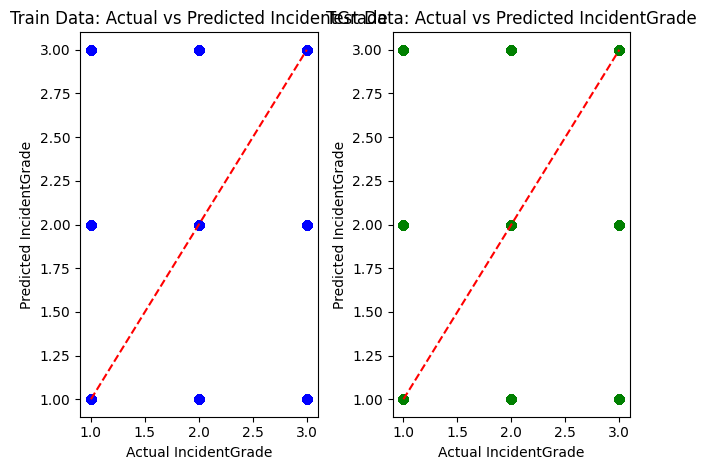

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load DataFrames
train_df = pd.read_csv('Processed_GUIDE_Train.xls')
test_df = pd.read_csv('Processed_GUIDE_Test.xls')

# Sample a subset of the data to avoid MemoryError
train_df = train_df.sample(frac=0.1, random_state=42)
test_df = test_df.sample(frac=0.1, random_state=42)

# Drop rows with NaNs in IncidentGrade
train_df = train_df.dropna(subset=['IncidentGrade'])

# Process categorical columns in training DataFrame
categorical_cols_train = train_df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols_train:
    train_df[col] = train_df[col].astype(str)
    train_df[col] = le.fit_transform(train_df[col])

# Process categorical columns in test DataFrame
categorical_cols_test = test_df.select_dtypes(include=['object']).columns
for col in categorical_cols_test:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = le.fit_transform(test_df[col])

# Change data types
dtype = {
    'IncidentId': 'int32',
    'AlertId': 'int32',
    'Timestamp': 'int32',
    'DetectorId': 'int32',
    'AlertTitle': 'int32',
    'Category': 'int32',
    'IncidentGrade': 'float32',
    'EntityType': 'int32',
    'EvidenceRole': 'int32',
    'DeviceId': 'int32',
    'IpAddress': 'int32',
    'Url': 'int32',
    'AccountSid': 'int32',
    'AccountUpn': 'int32',
    'AccountObjectId': 'int32',
    'AccountName': 'int32',
    'DeviceName': 'int32',
    'NetworkMessageId': 'int32',
    'RegistryKey': 'int32',
    'RegistryValueName': 'int32',
    'RegistryValueData': 'int32',
    'ApplicationId': 'int32',
    'ApplicationName': 'int32',
    'OAuthApplicationId': 'int32',
    'FileName': 'int32',
    'FolderPath': 'int32',
    'ResourceIdName': 'int32',
    'OSFamily': 'int32',
    'OSVersion': 'int32',
    'CountryCode': 'int32',
    'State': 'int32',
    'City': 'int32'
}

# Split train data into feature and target
X_train = train_df.drop('IncidentGrade', axis=1)
y_train = train_df['IncidentGrade']

X_test = test_df.drop('IncidentGrade', axis=1)
y_test = test_df['IncidentGrade']

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Gradient Boosting Classifier with default hyperparameters
gbc = GradientBoostingClassifier()

# Fit the model
gbc.fit(X_train, y_train)

# Predictions
y_pred_gbc = gbc.predict(X_test)

# Evaluate
precision_gbc = precision_score(y_test, y_pred_gbc, average='macro')
recall_gbc = recall_score(y_test, y_pred_gbc, average='macro')
f1_gbc = f1_score(y_test, y_pred_gbc, average='macro')

print(f'Gradient Boosting - Precision: {precision_gbc:.2f}')
print(f'Gradient Boosting - Recall: {recall_gbc:.2f}')
print(f'Gradient Boosting - F1 Score: {f1_gbc:.2f}')

# Training data plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, gbc.predict(X_train), alpha=0.7, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--k', color='red')
plt.xlabel('Actual IncidentGrade')
plt.ylabel('Predicted IncidentGrade')
plt.title('Train Data: Actual vs Predicted IncidentGrade')

# Test data plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gbc, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')
plt.xlabel('Actual IncidentGrade')
plt.ylabel('Predicted IncidentGrade')
plt.title('Test Data: Actual vs Predicted IncidentGrade')

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

NuralNetwork

d:\MD112\Capstone\Microsoft Cybersecurity Incidents\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
94646/94646 ━━━━━━━━━━━━━━━━━━━━ 132s 1ms/step - accuracy: 0.4334 - loss: -252361568.0000
Epoch 2/20
94646/94646 ━━━━━━━━━━━━━━━━━━━━ 132s 1ms/step - accuracy: 0.4337 - loss: -7494139904.0000
Epoch 3/20
94646/94646 ━━━━━━━━━━━━━━━━━━━━ 1351s 14ms/step - accuracy: 0.4344 - loss: -38839607296.0000
Epoch 4/20
94646/94646 ━━━━━━━━━━━━━━━━━━━━ 136s 1ms/step - accuracy: 0.4331 - loss: -112573054976.0000
Epoch 5/20
94646/94646 ━━━━━━━━━━━━━━━━━━━━ 1647s 17ms/step - accuracy: 0.4338 - loss: -246576201728.0000
Epoch 6/20
94646/94646 ━━━━━━━━━━━━━━━━━━━━ 147s 2ms/step - accuracy: 0.4342 - loss: -459188797440.0000
Epoch 7/20
94646/94646 ━━━━━━━━━━━━━━━━━━━━ 148s 2ms/step - accuracy: 0.4338 - loss: -768032702464.0000
Epoch 8/20
94646/94646 ━━━━━━━━━━━━━━━━━━━━ 151s 2ms/step - accuracy: 0.4337 - loss: -1192650735616.0000
Epoch 9/20
94646/94646 ━━━━━━━━━━━━━━━━━━━━ 1487s 16ms/step - accuracy: 0.4335 - loss: -1746512117760.0000
Epoch 10/20
94646/94646 ━━━━━━━━━━━━━━━━━━━━ 2230s 24ms/step -

d:\MD112\Capstone\Microsoft Cybersecurity Incidents\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Neural Network - Precision: 0.14
Neural Network - Recall: 0.33
Neural Network - F1 Score: 0.20
29577/29577 ━━━━━━━━━━━━━━━━━━━━ 22s 759us/step


C:\Users\ragav\AppData\Local\Temp\ipykernel_16788\2098992721.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--k', color='red')
C:\Users\ragav\AppData\Local\Temp\ipykernel_16788\2098992721.py:76: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')


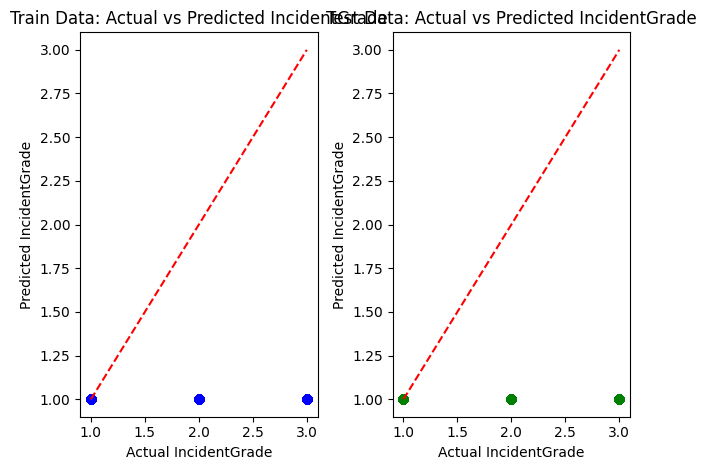

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load DataFrames
train_df = pd.read_csv('Processed_GUIDE_Train.xls')
test_df = pd.read_csv('Processed_GUIDE_Test.xls')

# Sample a subset of the data to avoid MemoryError
train_df = train_df.sample(frac=0.1, random_state=42)
test_df = test_df.sample(frac=0.1, random_state=42)

# Drop rows with NaNs in IncidentGrade
train_df = train_df.dropna(subset=['IncidentGrade'])

# Process categorical columns in training and test DataFrames
categorical_cols = train_df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    combined_data = pd.concat([train_df[col], test_df[col].astype(str)], axis=0)
    le.fit(combined_data)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col].astype(str))

# Change data types
dtype = {
    'IncidentId': 'int32',
    'AlertId': 'int32',
    'Timestamp': 'int32',
    'DetectorId': 'int32',
    'AlertTitle': 'int32',
    'Category': 'int32',
    'IncidentGrade': 'float32',
    'EntityType': 'int32',
    'EvidenceRole': 'int32',
    'DeviceId': 'int32',
    'IpAddress': 'int32',
    'Url': 'int32',
    'AccountSid': 'int32',
    'AccountUpn': 'int32',
    'AccountObjectId': 'int32',
    'AccountName': 'int32',
    'DeviceName': 'int32',
    'NetworkMessageId': 'int32',
    'RegistryKey': 'int32',
    'RegistryValueName': 'int32',
    'RegistryValueData': 'int32',
    'ApplicationId': 'int32',
    'ApplicationName': 'int32',
    'OAuthApplicationId': 'int32',
    'FileName': 'int32',
    'FolderPath': 'int32',
    'ResourceIdName': 'int32',
    'OSFamily': 'int32',
    'OSVersion': 'int32',
    'CountryCode': 'int32',
    'State': 'int32',
    'City': 'int32'
}


# Split train data into features and target
X_train = train_df.drop('IncidentGrade', axis=1)
y_train = train_df['IncidentGrade']

X_test = test_df.drop('IncidentGrade', axis=1)
y_test = test_df['IncidentGrade']

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=1)

# Predictions
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate
precision_nn = precision_score(y_test, y_pred_nn, average='macro')
recall_nn = recall_score(y_test, y_pred_nn, average='macro')
f1_nn = f1_score(y_test, y_pred_nn, average='macro')

print(f'Neural Network - Precision: {precision_nn:.2f}')
print(f'Neural Network - Recall: {recall_nn:.2f}')
print(f'Neural Network - F1 Score: {f1_nn:.2f}')

# Training data plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, (model.predict(X_train) > 0.5).astype("int32"), alpha=0.7, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--k', color='red')
plt.xlabel('Actual IncidentGrade')
plt.ylabel('Predicted IncidentGrade')
plt.title('Train Data: Actual vs Predicted IncidentGrade')

# Test data plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_nn, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')
plt.xlabel('Actual IncidentGrade')
plt.ylabel('Predicted IncidentGrade')
plt.title('Test Data: Actual vs Predicted IncidentGrade')

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()


SVM

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC

# Load DataFrames
train_df = pd.read_csv('Processed_GUIDE_Train.xls')
test_df = pd.read_csv('Processed_GUIDE_Test.xls')

# Sample a subset of the data to avoid MemoryError
train_df = train_df.sample(n=100000, random_state=42)
test_df = test_df.sample(n=100000, random_state=42)

# Drop rows with NaNs in IncidentGrade
train_df = train_df.dropna(subset=['IncidentGrade'])

# Process categorical columns in training and test DataFrames
categorical_cols = train_df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    combined_data = pd.concat([train_df[col], test_df[col].astype(str)], axis=0)
    le.fit(combined_data)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col].astype(str))

# Change data types
dtype = {
    'IncidentId': 'int32',
    'AlertId': 'int32',
    'Timestamp': 'int32',
    'DetectorId': 'int32',
    'AlertTitle': 'int32',
    'Category': 'int32',
    'IncidentGrade': 'float32',
    'EntityType': 'int32',
    'EvidenceRole': 'int32',
    'DeviceId': 'int32',
    'IpAddress': 'int32',
    'Url': 'int32',
    'AccountSid': 'int32',
    'AccountUpn': 'int32',
    'AccountObjectId': 'int32',
    'AccountName': 'int32',
    'DeviceName': 'int32',
    'NetworkMessageId': 'int32',
    'RegistryKey': 'int32',
    'RegistryValueName': 'int32',
    'RegistryValueData': 'int32',
    'ApplicationId': 'int32',
    'ApplicationName': 'int32',
    'OAuthApplicationId': 'int32',
    'FileName': 'int32',
    'FolderPath': 'int32',
    'ResourceIdName': 'int32',
    'OSFamily': 'int32',
    'OSVersion': 'int32',
    'CountryCode': 'int32',
    'State': 'int32',
    'City': 'int32'
}

train_df = train_df.astype(dtype)
test_df = test_df.astype(dtype)

# Split train data into features and target
x_train = train_df.drop('IncidentGrade', axis=1)
y_train = train_df['IncidentGrade']

x_test = test_df.drop('IncidentGrade', axis=1)
y_test = test_df['IncidentGrade']

# Scale features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the parameter grid
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto'],
#     'degree': [2, 3]  # Only relevant for 'poly' kernel
# }

param_grid = {
    'C': [10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [3]  # Only relevant for 'poly' kernel
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42, max_iter=1000), param_grid, cv=3, scoring='f1_macro', verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_svm = best_model.predict(x_test)

# Evaluate the best model
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print(f'SVM - Precision: {precision_svm:.2f}')
print(f'SVM - Recall: {recall_svm:.2f}')
print(f'SVM - F1 Score: {f1_svm:.2f}')

Fitting 3 folds for each of 4 candidates, totalling 12 fits


d:\MD112\Capstone\Microsoft Cybersecurity Incidents\myenv\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........C=10, degree=3, gamma=scale, kernel=linear; total time=  10.5s


d:\MD112\Capstone\Microsoft Cybersecurity Incidents\myenv\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........C=10, degree=3, gamma=scale, kernel=linear; total time=   9.5s


d:\MD112\Capstone\Microsoft Cybersecurity Incidents\myenv\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........C=10, degree=3, gamma=scale, kernel=linear; total time=   9.3s


d:\MD112\Capstone\Microsoft Cybersecurity Incidents\myenv\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ............C=10, degree=3, gamma=scale, kernel=rbf; total time=  30.5s


d:\MD112\Capstone\Microsoft Cybersecurity Incidents\myenv\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ............C=10, degree=3, gamma=scale, kernel=rbf; total time=  23.0s


d:\MD112\Capstone\Microsoft Cybersecurity Incidents\myenv\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ............C=10, degree=3, gamma=scale, kernel=rbf; total time=  22.1s


d:\MD112\Capstone\Microsoft Cybersecurity Incidents\myenv\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..........C=10, degree=3, gamma=auto, kernel=linear; total time=   6.7s


d:\MD112\Capstone\Microsoft Cybersecurity Incidents\myenv\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..........C=10, degree=3, gamma=auto, kernel=linear; total time=   7.1s


d:\MD112\Capstone\Microsoft Cybersecurity Incidents\myenv\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..........C=10, degree=3, gamma=auto, kernel=linear; total time=   6.6s


d:\MD112\Capstone\Microsoft Cybersecurity Incidents\myenv\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .............C=10, degree=3, gamma=auto, kernel=rbf; total time=  25.2s


d:\MD112\Capstone\Microsoft Cybersecurity Incidents\myenv\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .............C=10, degree=3, gamma=auto, kernel=rbf; total time=  23.4s


d:\MD112\Capstone\Microsoft Cybersecurity Incidents\myenv\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .............C=10, degree=3, gamma=auto, kernel=rbf; total time=57.3min


d:\MD112\Capstone\Microsoft Cybersecurity Incidents\myenv\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameters: {'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
SVM - Precision: 0.34
SVM - Recall: 0.34
SVM - F1 Score: 0.31


LogisticRegression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

train_df = pd.read_csv('Processed_GUIDE_Train.xls')
test_df = pd.read_csv('Processed_GUIDE_Test.xls')

# Sample a subset of the data to avoid MemoryError
train_df = train_df.sample(n=100000, random_state=42)
test_df = test_df.sample(n=100000, random_state=42)

# Drop rows with NaNs in IncidentGrade
train_df = train_df.dropna(subset=['IncidentGrade'])

# Process categorical columns in training and test DataFrames
categorical_cols = train_df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    combined_data = pd.concat([train_df[col], test_df[col].astype(str)], axis=0)
    le.fit(combined_data)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col].astype(str))

# Change data types
dtype = {
    'IncidentId': 'int32',
    'AlertId': 'int32',
    'Timestamp': 'int32',
    'DetectorId': 'int32',
    'AlertTitle': 'int32',
    'Category': 'int32',
    'IncidentGrade': 'float32',
    'EntityType': 'int32',
    'EvidenceRole': 'int32',
    'DeviceId': 'int32',
    'IpAddress': 'int32',
    'Url': 'int32',
    'AccountSid': 'int32',
    'AccountUpn': 'int32',
    'AccountObjectId': 'int32',
    'AccountName': 'int32',
    'DeviceName': 'int32',
    'NetworkMessageId': 'int32',
    'RegistryKey': 'int32',
    'RegistryValueName': 'int32',
    'RegistryValueData': 'int32',
    'ApplicationId': 'int32',
    'ApplicationName': 'int32',
    'OAuthApplicationId': 'int32',
    'FileName': 'int32',
    'FolderPath': 'int32',
    'ResourceIdName': 'int32',
    'OSFamily': 'int32',
    'OSVersion': 'int32',
    'CountryCode': 'int32',
    'State': 'int32',
    'City': 'int32'
}

# Split train data into features and target
x_train = train_df.drop('IncidentGrade', axis=1)
y_train = train_df['IncidentGrade']

x_test = test_df.drop('IncidentGrade', axis=1)
y_test = test_df['IncidentGrade']

#Scale features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize Logistic Regression model
Lr = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model
Lr.fit(x_train, y_train)

# Predictions
y_pred_lr = Lr.predict(x_test)

# Evaluate
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print(f'Logistic Regression - Precision: {precision_lr:.2f}')
print(f'Logistic Regression - Recall: {recall_lr:.2f}')
print(f'Logistic Regression - F1 Score: {f1_lr:.2f}')


Logistic Regression - Precision: 0.59
Logistic Regression - Recall: 0.53
Logistic Regression - F1 Score: 0.52


d:\MD112\Capstone\Microsoft Cybersecurity Incidents\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Load DataFrames
train_df = pd.read_csv('Processed_GUIDE_Train.xls')
test_df = pd.read_csv('Processed_GUIDE_Test.xls')

# Sample a subset of the data to avoid MemoryError
train_df = train_df.sample(n=100000, random_state=42)
test_df = test_df.sample(n=100000, random_state=42)

# Drop rows with NaNs in IncidentGrade
train_df = train_df.dropna(subset=['IncidentGrade'])

# Process categorical columns in training and test DataFrames
categorical_cols = train_df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    combined_data = pd.concat([train_df[col], test_df[col].astype(str)], axis=0)
    le.fit(combined_data)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col].astype(str))

# Change data types
dtype = {
    'IncidentId': 'int32',
    'AlertId': 'int32',
    'Timestamp': 'int32',
    'DetectorId': 'int32',
    'AlertTitle': 'int32',
    'Category': 'int32',
    'IncidentGrade': 'float32',
    'EntityType': 'int32',
    'EvidenceRole': 'int32',
    'DeviceId': 'int32',
    'IpAddress': 'int32',
    'Url': 'int32',
    'AccountSid': 'int32',
    'AccountUpn': 'int32',
    'AccountObjectId': 'int32',
    'AccountName': 'int32',
    'DeviceName': 'int32',
    'NetworkMessageId': 'int32',
    'RegistryKey': 'int32',
    'RegistryValueName': 'int32',
    'RegistryValueData': 'int32',
    'ApplicationId': 'int32',
    'ApplicationName': 'int32',
    'OAuthApplicationId': 'int32',
    'FileName': 'int32',
    'FolderPath': 'int32',
    'ResourceIdName': 'int32',
    'OSFamily': 'int32',
    'OSVersion': 'int32',
    'CountryCode': 'int32',
    'State': 'int32',
    'City': 'int32'
}

train_df = train_df.astype(dtype)
test_df = test_df.astype(dtype)

# Split train data into features and target
x_train = train_df.drop('IncidentGrade', axis=1)
y_train = train_df['IncidentGrade']

x_test = test_df.drop('IncidentGrade', axis=1)
y_test = test_df['IncidentGrade']

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Feature selection
k = 20  # Select top 20 features
selector = SelectKBest(score_func=f_classif, k=k)
x_train = selector.fit_transform(x_train, y_train)
x_val = selector.transform(x_val)
x_test = selector.transform(x_test)

# Manual hyperparameter tuning
best_f1 = 0
best_C = 1
best_solver = 'liblinear'

for C in [0.001, 0.01, 0.1, 1, 10]:
    for solver in ['liblinear', 'saga']:
        # Initialize Logistic Regression model
        Lr = LogisticRegression(random_state=42, max_iter=1000, C=C, solver=solver)

        # Fit the model
        Lr.fit(x_train, y_train)

        # Predictions on validation set
        y_pred_val = Lr.predict(x_val)

        # Evaluate on validation set
        f1_val = f1_score(y_val, y_pred_val, average='macro')

        # Check if the current model is better than the best model
        if f1_val > best_f1:
            best_f1 = f1_val
            best_C = C
            best_solver = solver

# Initialize Logistic Regression model with best hyperparameters
Lr = LogisticRegression(random_state=42, max_iter=1000, C=best_C, solver=best_solver)

# Fit the model on the entire training set
Lr.fit(x_train, y_train)

# Predictions on test set
y_pred_lr = Lr.predict(x_test)

# Evaluate on test set
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print(f'Logistic Regression - Precision: {precision_lr:.2f}')
print(f'Logistic Regression - Recall: {recall_lr:.2f}')
print(f'Logistic Regression - F1 Score: {f1_lr:.2f}')

Logistic Regression - Precision: 0.59
Logistic Regression - Recall: 0.51
Logistic Regression - F1 Score: 0.48
